# Predicting Listing Gains in the Indian IPO Market Using TensorFlow

#### Table of Contents
* [Introduction](#1)
* [Brief Data Overview](#2)
* [Exploratory Data Analysis](#3)
* [Outliers](#4)
* [Setting the Target and Predictor Variables](#5)
* [Training and Testing Sets](#6)
* [Creating Deep Learning Neural Network](#7)
* [Conclusion](#8)

#### Introduction <a class='anchor' id='1'></a>

In this project, we will build a deep learning classification model to determine if there will be lsiting gains for an Initial Public OFfering (IPO) in the Indian market. Listing gains are the percentage increase in the share price of a company from its IPO issue price.


We will be using the data set from moneycontrol.

The data consists of following columns:

- Date: date when the IPO was listed
- IPOName: name of the IPO
- Issue_Size: size of the IPO issue, in INR Crores
- Subscription_QIB: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category
- Subscription_HNI: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category
- Subscription_RII: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category
- Subscription_Total: total number of times the IPO was subscribed overall
- Issue_Price: the price in INR at which the IPO was issued
- Listing_Gains_Percent: is the percentage gain in the listing price over the issue price

#### Import Libraries

In [2]:
import numpy as np, pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#### Import data set

In [3]:
df = pd.read_csv("D:/DataQuest/Indian_IPO_Market_Data.csv")

#### Brief Data Overview <a class='anchor' id='2'></a>

In [4]:
df.head(5)

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [5]:
df.tail(5)

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [7]:
df.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

There are no null values.

In [8]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


#### Exploratory Data Analysis <a class='anchor' id='3'></a>

In [9]:
#Create categorical target variable for our classification model, profit gain positive = 1, else 0
df['Listing_Gains_Profit'] = df['Listing_Gains_Percent'].apply(lambda x: 1 if x > 0 else 0)
df['Listing_Gains_Profit'].value_counts(normalize=True)

Listing_Gains_Profit
1    0.545455
0    0.454545
Name: proportion, dtype: float64

Data set for target variable is balanced.

As date and name is not relevant to our model, we will remove these columns.

In [10]:
df.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent', 'Listing_Gains_Profit'],
      dtype='object')

In [11]:
df_new = df.drop(['Date ','IPOName'], axis=1)

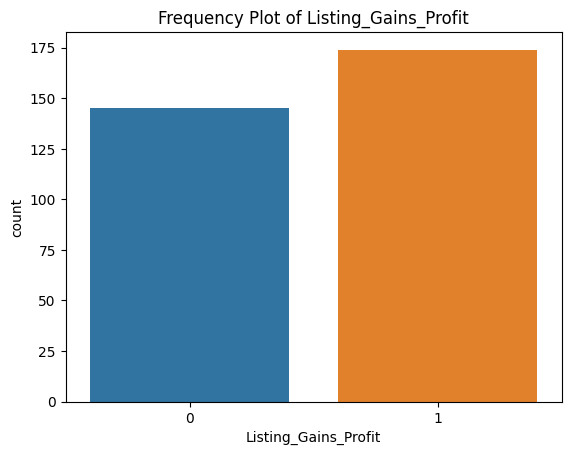

In [12]:
#Visualize Frequency Plot of Target Variable
sns.countplot(data=df_new, x='Listing_Gains_Profit', hue='Listing_Gains_Profit',legend=False)
plt.title('Frequency Plot of Listing_Gains_Profit')
plt.show()

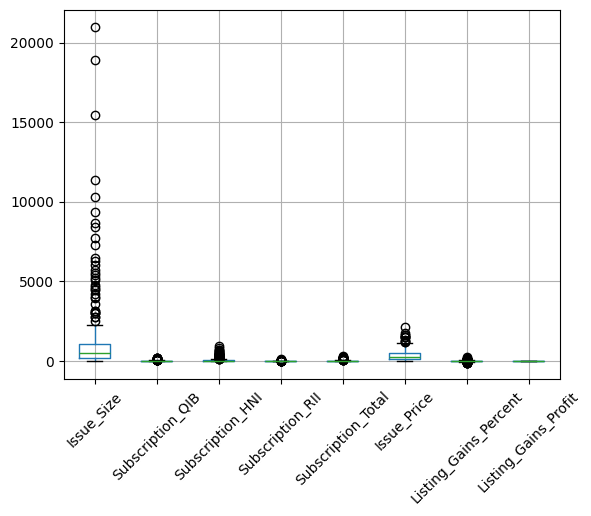

In [13]:
#Explore Continuous Data Types using Boxplots
numeric = df_new.select_dtypes(exclude='object')

numeric.boxplot()
plt.xticks(rotation=45)
plt.show()

In [14]:
for col in numeric:

    quartiles = np.percentile(numeric[col], [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5 * iqr)
    upper_bound = quartiles[2] + (1.5 * iqr)
    num_outliers =sum((numeric[col] < lower_bound) | (numeric[col] > upper_bound))

    print(f"The {col} column has [{num_outliers}] outliers according to the boxplot method.")

The Issue_Size column has [34] outliers according to the boxplot method.
The Subscription_QIB column has [35] outliers according to the boxplot method.
The Subscription_HNI column has [48] outliers according to the boxplot method.
The Subscription_RII column has [33] outliers according to the boxplot method.
The Subscription_Total column has [31] outliers according to the boxplot method.
The Issue_Price column has [12] outliers according to the boxplot method.
The Listing_Gains_Percent column has [46] outliers according to the boxplot method.
The Listing_Gains_Profit column has [0] outliers according to the boxplot method.


We will deal with these outliers later.

In [15]:
#Checking for relationship between target and predictors
numeric = numeric.drop(['Listing_Gains_Percent'], axis=1)

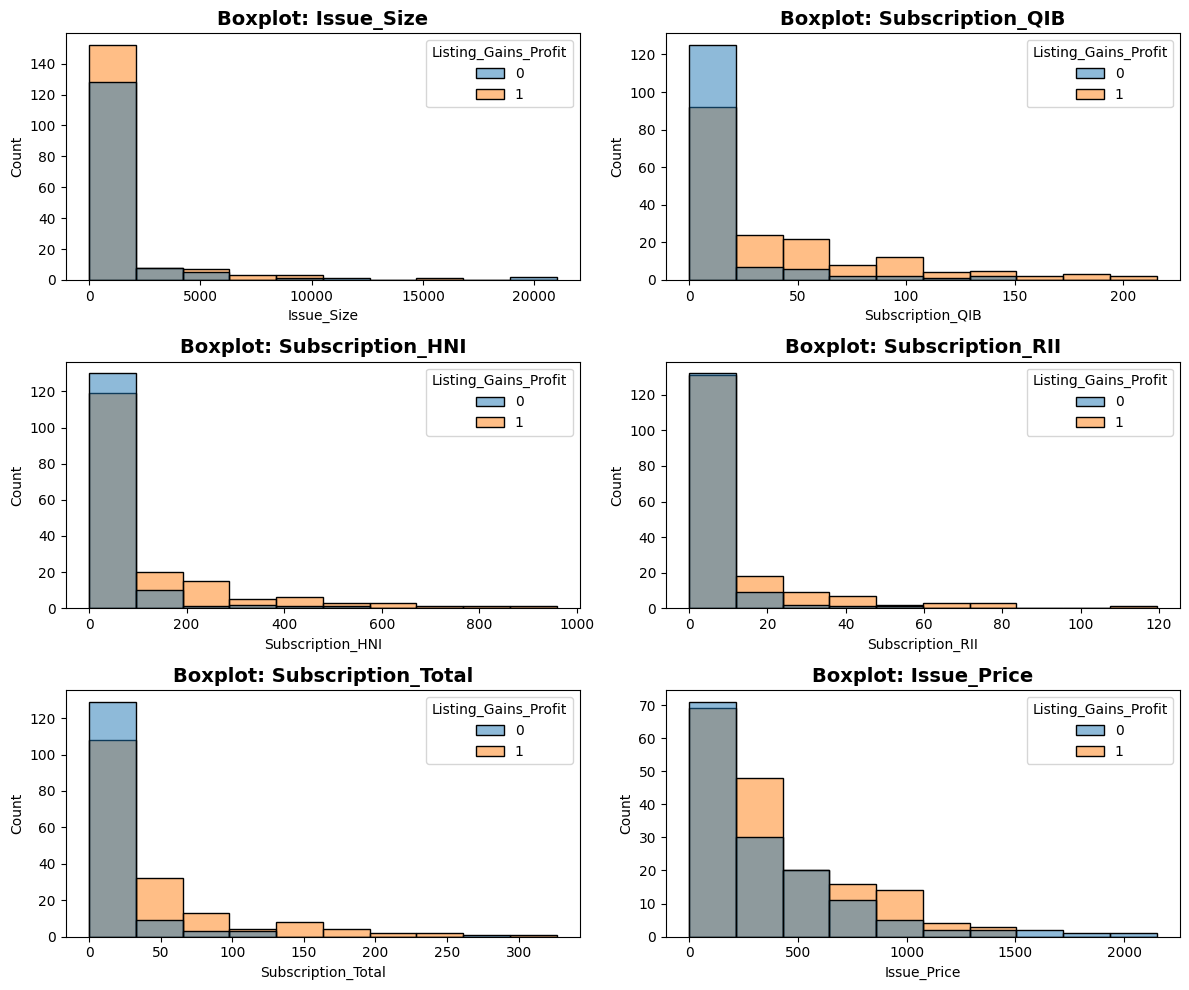

In [16]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
ax = ax.flatten()
for i, cat in enumerate(numeric):
    if cat == 'Listing_Gains_Profit':
        break
    else:
        sns.histplot(x=cat, data=numeric, hue='Listing_Gains_Profit', bins=10, ax=ax[i])
        ax[i].set_title(f"Boxplot: {cat}", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

We see the distribution patterns for the variables are relatively similar in pattern across variables. We do note slight differences between IPOs with profit vs loss. The IPO with profit tend to have higher subscription and issue prices can be higher.

In [17]:
#Let's check correlation between the variables.
corr_matrix = numeric.corr()
corr_matrix['Listing_Gains_Profit'].sort_values(ascending=False)

Listing_Gains_Profit    1.000000
Subscription_QIB        0.323499
Subscription_Total      0.283340
Subscription_HNI        0.271879
Subscription_RII        0.240842
Issue_Price             0.039548
Issue_Size              0.004717
Name: Listing_Gains_Profit, dtype: float64

<Axes: >

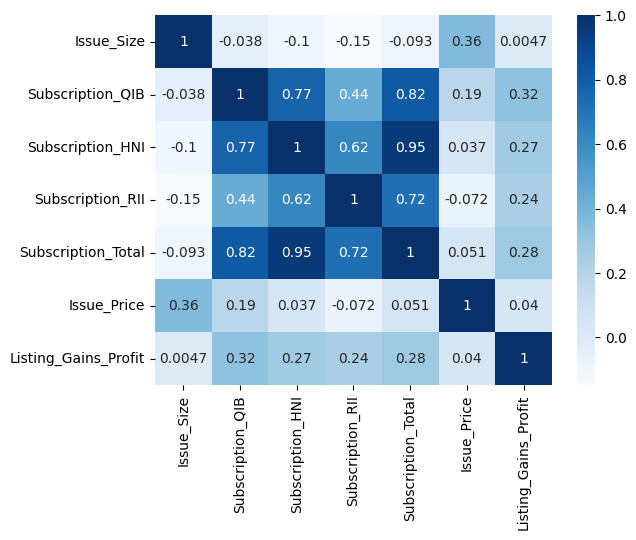

In [18]:
#Heatmap of our predictor and target
sns.heatmap(corr_matrix,cmap="Blues", annot=True)

We see very high correlation between the different subscription predictors, especially subscription total in relation with the other subscription variables. This is not surprising. 

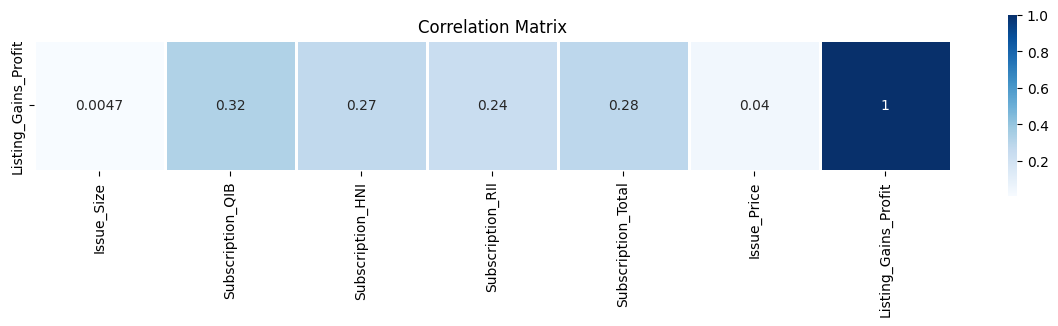

In [19]:
#Looking specifically at our target variable
fig, ax = plt.subplots(figsize=(12,3))

sns.heatmap(
    corr_matrix.loc[['Listing_Gains_Profit']],
    cmap='Blues',
    annot=True,
    ax=ax,
    linewidth = 1, 
    square =True,
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Only qualified institutional buyer seem to have high correlation (>0.30) to listing profit gains.

#### Outliers <a class='anchor' id='4'></a>

In [20]:
for col in numeric:

    quartiles = np.percentile(numeric[col], [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5 * iqr)
    upper_bound = quartiles[2] + (1.5 * iqr)
    num_outliers =sum((numeric[col] < lower_bound) | (numeric[col] > upper_bound))

    print(f"The {col} column has [{num_outliers}] outliers according to the boxplot method.")

The Issue_Size column has [34] outliers according to the boxplot method.
The Subscription_QIB column has [35] outliers according to the boxplot method.
The Subscription_HNI column has [48] outliers according to the boxplot method.
The Subscription_RII column has [33] outliers according to the boxplot method.
The Subscription_Total column has [31] outliers according to the boxplot method.
The Issue_Price column has [12] outliers according to the boxplot method.
The Listing_Gains_Profit column has [0] outliers according to the boxplot method.


It looks like there is quite a lot of outliers in our data (total data size = 319).

In [21]:
#Let's take a look at the outliers
for col in numeric:
    quartiles = np.percentile(numeric[col], [25, 50, 75])
    iqr = quartiles[2] - quartiles[0]
    lower_bound = quartiles[0] - (1.5 * iqr)
    upper_bound = quartiles[2] + (1.5 * iqr)
    print(f'{col}: {lower_bound} to {upper_bound}')
    print(numeric[numeric[col] < lower_bound][col])
    print(numeric[numeric[col] > upper_bound][col])
    print('--------------------------------')


Issue_Size: -1227.4875000000002 to 2496.4925000000003
Series([], Name: Issue_Size, dtype: float64)
53     15475.00
105     4533.60
129     3000.00
151     6057.00
154     3000.00
180     5700.94
181     8400.00
185    11372.00
189     8695.01
200     4473.00
201     4229.00
203     4016.00
213     4750.00
218     3125.00
223    10286.20
233     6479.55
237     4633.00
253     2500.00
254     7734.99
255     5550.00
262     9375.00
270     2998.00
271     5089.29
272     3929.91
273     2790.00
278     2768.00
279     5375.00
281     6273.50
284    18915.90
288     7318.15
300     3600.00
301     3149.00
307    21000.00
310     5235.00
Name: Issue_Size, dtype: float64
--------------------------------
Subscription_QIB: -49.07750000000001 to 84.86250000000001
Series([], Name: Subscription_QIB, dtype: float64)
11      96.06
13      93.86
16     144.43
145     94.03
148     85.08
160    144.61
169    148.71
176    134.66
179    131.32
183    150.96
186    118.41
192    103.35
193    101.93


For our outliers, we will assign the lower bound value to outliers below the lower bound and upper bound value to the outliers above the upper bound.

In [38]:
for col in numeric:
    quartiles = np.percentile(numeric[col], [25, 50, 75]).astype(float)
    iqr = quartiles[2] - quartiles[0]
    upper_bound = quartiles[2] + (1.5 * iqr)
    numeric.loc[numeric[col] > upper_bound, col] = upper_bound
    num_outliers = sum((numeric[col] > upper_bound))
    print(f"The {col} column has [{num_outliers}] outliers according to the boxplot method.")

The Issue_Size column has [0] outliers according to the boxplot method.
The Subscription_QIB column has [0] outliers according to the boxplot method.
The Subscription_HNI column has [0] outliers according to the boxplot method.
The Subscription_RII column has [0] outliers according to the boxplot method.
The Subscription_Total column has [0] outliers according to the boxplot method.
The Issue_Price column has [0] outliers according to the boxplot method.
The Listing_Gains_Profit column has [0] outliers according to the boxplot method.


In [23]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    float64
 6   Listing_Gains_Profit  319 non-null    float64
dtypes: float64(7)
memory usage: 17.6 KB


In [24]:
numeric.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,763.561238,21.521183,40.356426,6.060940,20.456646,362.147335,0.545455
std,769.689122,29.104549,57.427921,6.176882,27.217740,312.272967,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,1.000000
max,2496.492500,84.862500,153.355000,19.600000,81.020000,1161.500000,1.000000


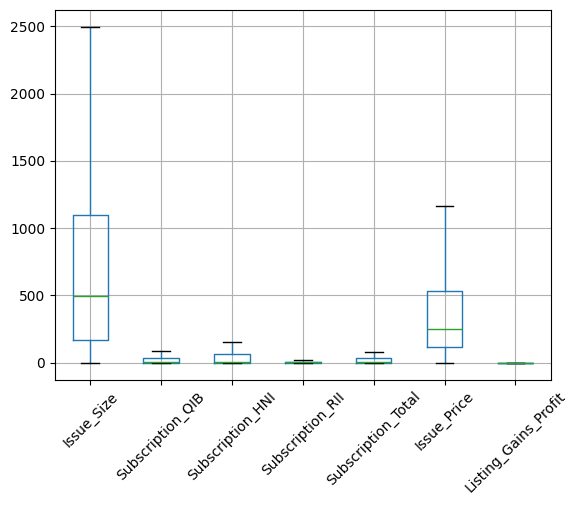

In [25]:
numeric.boxplot()
plt.xticks(rotation=45)
plt.show()

#### Setting the Target and Predictor Variables <a class='anchor' id='5'></a>

In [26]:
#Target and Predictors
target_variable = ['Listing_Gains_Profit']
predictors = list(set(list(numeric.columns)) - set(target_variable))

#Normalization
numeric[predictors] = numeric[predictors] / numeric[predictors].max()

numeric[predictors].describe()

,Issue_Size,Subscription_QIB,Issue_Price,Subscription_RII,Subscription_HNI,Subscription_Total
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.311793,0.309232,0.263157,0.252489
std,0.308308,0.342961,0.268853,0.315147,0.374477,0.335939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.102454,0.065051,0.008184,0.020304
50%,0.198779,0.058212,0.215239,0.174490,0.033061,0.060849
75%,0.440618,0.408131,0.461472,0.439031,0.404910,0.412182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Training and Testing Sets <a class='anchor' id='6'></a>

In [27]:
X = numeric[predictors].values
y = numeric[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape)
print(X_test.shape)

(223, 6)
(96, 6)


#### Creating Deep Learning Neural Network <a class='anchor' id='7'></a>

In [28]:
#Creation of layers
input_layer = tf.keras.Input(shape=(X_train.shape[1],)) 
hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer1)

hidden_layer3 = tf.keras.layers.Dense(16, activation='relu')(hidden_layer2)
hidden_layer4 = tf.keras.layers.Dense(8, activation='relu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(4, activation='relu')(hidden_layer4)

#Output
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer5)

#Instantiate model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5     

In [29]:
optimizer = tf.keras.optimizers.Adam(0.001) #We will use Adam optimizer
loss = tf.keras.losses.BinaryCrossentropy() #Instantiate loss function binarycrossentropy for binary classification
metrics = ['accuracy']

#Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#Train model
model.fit(X_train, y_train, epochs=150, verbose=0)

#Evaluate model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 834us/step - loss: 0.3795 - accuracy: 0.8386
[0.3794620633125305, 0.8385650515556335]
3/3 [==============================] - 0s 999us/step - loss: 0.8575 - accuracy: 0.6354
[0.8574903011322021, 0.6354166865348816]


In [30]:
#We try adding dropout layers - because our accuracy between training and unseen data have some discrepancy
input_layer = tf.keras.Input(shape=(X_train.shape[1],)) #Input layer
hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(input_layer) #1st hidden layer
drop1 = tf.keras.layers.Dropout(rate=0.40)(hidden_layer1) #1st drop with input from 1st hidden
hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(drop1) #2nd hidden with input from 1st drop

drop2 = tf.keras.layers.Dropout(rate=0.20)(hidden_layer2)
hidden_layer3 = tf.keras.layers.Dense(16, activation='relu')(drop2)
hidden_layer4 = tf.keras.layers.Dense(8, activation='relu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(4, activation='relu')(hidden_layer4)

#Output
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer5)

#Instantiate model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 8)                 136 

In [31]:
optimizer = tf.keras.optimizers.Adam(0.001) #We will use Adam optimizer
loss = tf.keras.losses.BinaryCrossentropy() #Instantiate loss function binarycrossentropy for binary classification
metrics = ['accuracy']

#Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#Train model
model.fit(X_train, y_train, epochs=150, verbose=0)

#Evaluate model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 1ms/step - loss: 0.5468 - accuracy: 0.6906
[0.5467578172683716, 0.6905829310417175]
3/3 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6771
[0.631070077419281, 0.6770833134651184]


In [32]:
#Here we try 'mae' for loss function
optimizer = tf.keras.optimizers.Adam(0.001)
loss = 'mae' #try mae for loss function
metrics = ['accuracy']

#Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#Train model
model.fit(X_train, y_train, epochs=150, verbose=0)

#Evaluate model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 920us/step - loss: 0.2918 - accuracy: 0.7130
[0.29182735085487366, 0.713004469871521]
3/3 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.6667
[0.33185091614723206, 0.6666666865348816]


In [33]:
#Here we try SGD Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
loss = tf.keras.losses.BinaryCrossentropy()
metrics = ['accuracy']

#Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#Train model
model.fit(X_train, y_train, epochs=150, verbose=0)

#Evaluate model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 920us/step - loss: 0.5078 - accuracy: 0.7309
[0.5077930688858032, 0.7309417128562927]
3/3 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6875
[0.6576513648033142, 0.6875]


Next we try changing up our deep learning network layers

In [34]:
#Decrease number of nodes per layer
#Creation of layers
input_layer = tf.keras.Input(shape=(X_train.shape[1],)) 
hidden_layer1 = tf.keras.layers.Dense(32, activation='elu')(input_layer) 
drop1 = tf.keras.layers.Dropout(rate=0.40)(hidden_layer1) 
hidden_layer2 = tf.keras.layers.Dense(16, activation='elu')(drop1) 

drop2 = tf.keras.layers.Dropout(rate=0.20)(hidden_layer2)
hidden_layer3 = tf.keras.layers.Dense(8, activation='elu')(drop2)
hidden_layer4 = tf.keras.layers.Dense(4, activation='elu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(2, activation='elu')(hidden_layer4)

#Output
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer5)

#Instantiate model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_12 (Dense)            (None, 32)                224       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 4)                 36  

In [35]:
optimizer = tf.keras.optimizers.Adam(0.001)
loss = tf.keras.losses.BinaryCrossentropy() 
metrics = ['accuracy']

#Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#Train model
model.fit(X_train, y_train, epochs=250, verbose=0) #We increase epoch to 250

#Evaluate model
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 752us/step - loss: 0.6074 - accuracy: 0.6771
[0.6074231266975403, 0.6771300435066223]
3/3 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7292
[0.5919143557548523, 0.7291666865348816]


#### Conclusion <a class='anchor' id='8'></a>

We were able to achieve 68% accuracy on our training data and 73% accuracy on our test data. Ideally, we would like higher accuracy for our models. However, the accuracy for both training and testing data is similar, signifying that our model runs well testing on unseen data.

Model creation is an iterative process. We may need to take further steps to optimize our model.

We may consider:

- Hyperparameter Optimization: Tuning the learning rate, number of neural network layers, changing the number of nodes.

- Optimizers and Loss Functions: We can consider changing these as well.

- Features: Return to the basics and see if we can pick our features more selectively.

- Performance metrics: Instead of accuracy we can consider other metrics.

- Expertise knowledge: We may want to rely on expertise knowledge to tailor our predictor selection / hyperparameter tuning.